# Topic:
## IMPACT OF MAJOR EVENT ON FINACIAL MARKET

In [58]:
# We import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas_datareader as pdr
import yfinance as yf
import glob
from arch import arch_model
from matplotlib import pyplot
from tensorflow import keras

# Data Loading

Here we will use the the stock market data from yahoo finace website. The stocks data is collected from 1st jan 2000 to 17 feb 2023. The data of top ten companies was selected for the sensex index and the 




In [4]:
# We download the data from yahoo finance
start_date = datetime.datetime(2000,1,1)
end_date = datetime.datetime(2023,2,17)

In [5]:
quotes = pd.read_csv("C:/Users/manda/Desktop/CDAC/Untitled Folder 1/quotes.csv")
stock_symbol = quotes['Symbol']
del quotes
stock_symbols = stock_symbol.to_list()
stock_symbols[0]

'BAJFINANCE.NS'

In [7]:
for i in stock_symbols:
    df=yf.download(i,start=start_date,end=end_date,progress=False)
    df = pd.DataFrame(df)
    pd.DataFrame.to_csv(df,"C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET/"+i+".csv")

In [13]:
path = "C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET/"
all_files = glob.glob(path + "*.csv")
all_files

['C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\AXISBANK.NS.csv',
 'C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\BAJFINANCE.NS.csv',
 'C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\CIPLA.NS.csv',
 'C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\HINDUNILVR.NS.csv',
 'C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\INFY.csv',
 'C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\RELIANCE.NS.csv',
 'C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\SBIN.NS.csv',
 'C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\SUNPHARMA.NS.csv',
 'C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\TATAMOTORS.NS.csv',
 'C:/Users/manda/Desktop/CDAC/Untitled Folder 1/DATASET\\WIT.csv']

In [21]:
cnt=0
for i in all_files:
    data = pd.read_csv(i)
    print(stock_symbols[cnt]," has shape ", data.shape)
    cnt= cnt+1

BAJFINANCE.NS  has shape  (5778, 7)
CIPLA.NS  has shape  (5128, 7)
AXISBANK.NS  has shape  (5780, 7)
SBIN.NS  has shape  (5781, 7)
SUNPHARMA.NS  has shape  (5820, 7)
WIT  has shape  (5778, 7)
HINDUNILVR.NS  has shape  (5779, 7)
RELIANCE.NS  has shape  (5781, 7)
TATAMOTORS.NS  has shape  (5781, 7)
INFY  has shape  (5617, 7)


# Here we check if the data has null values

In [100]:
cnt=0
for i in all_files:
    data = pd.read_csv(i)
    print(stock_symbols[cnt]," have ", data.Close.isnull().sum() ," null values")
    cnt= cnt+1

BAJFINANCE.NS  have  0  null values
CIPLA.NS  have  0  null values
AXISBANK.NS  have  0  null values
SBIN.NS  have  0  null values
SUNPHARMA.NS  have  0  null values
WIT  have  0  null values
HINDUNILVR.NS  have  0  null values
RELIANCE.NS  have  0  null values
TATAMOTORS.NS  have  0  null values
INFY  have  0  null values


# From above we can see that there is no null value in the dataset

# EDA

In [36]:
# cnt=0
# for i in all_files:
#     data = pd.read_csv(i)
#     #data.hist()
#     pyplot.plot(data['Adj Close'])
#     pyplot.title("Adjuste Close price of "+ stock_symbols[cnt])
#     pyplot.show()
#     cnt=cnt+1    

# Model Fitting For One Stock

In [39]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-10-19,1.984835,2.199487,1.845450,2.196699,1.866598,41542018
1,2000-10-20,2.196699,2.377899,2.179973,2.352810,1.999250,15871118
2,2000-10-23,2.341659,2.341659,2.113069,2.157672,1.833436,6477138
3,2000-10-24,2.168822,2.207850,2.157672,2.179973,1.852386,3721720
4,2000-10-25,2.171610,2.196699,2.163247,2.177186,1.850017,3013248


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617 entries, 0 to 5616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5617 non-null   object 
 1   Open       5617 non-null   float64
 2   High       5617 non-null   float64
 3   Low        5617 non-null   float64
 4   Close      5617 non-null   float64
 5   Adj Close  5617 non-null   float64
 6   Volume     5617 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 307.3+ KB


In [41]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 5617
Train data length : 3932
Validation data lenth : 1685


In [42]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2000-10-19,1.984835
1,2000-10-20,2.196699
2,2000-10-23,2.341659
3,2000-10-24,2.168822
4,2000-10-25,2.171610
...,...,...
3927,2016-06-02,6.050000
3928,2016-06-03,6.055000
3929,2016-06-06,6.060000
3930,2016-06-07,6.055000


In [43]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
3932,2016-06-09,6.060
3933,2016-06-10,6.045
3934,2016-06-13,6.000
3935,2016-06-14,6.000
3936,2016-06-15,5.980
...,...,...
5612,2023-02-10,4.880
5613,2023-02-13,4.840
5614,2023-02-14,4.890
5615,2023-02-15,4.900


In [44]:
dataset_train = train_data.Open.values
dataset_train.shape

(3932,)

In [45]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(3932, 1)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(3932, 1)

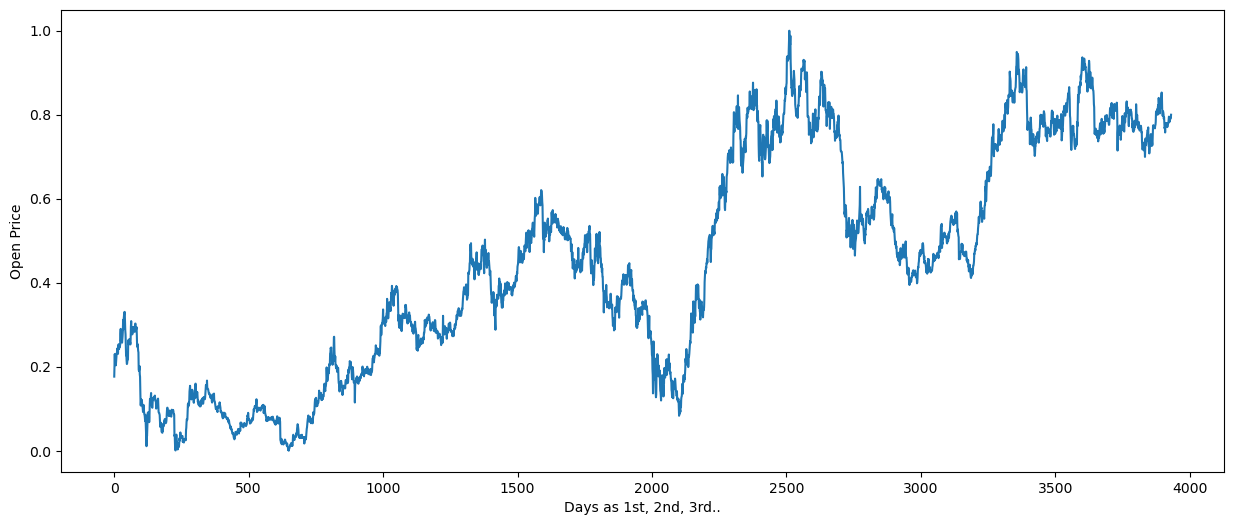

In [47]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [48]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [49]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (3882, 50)
Shape of y_train before reshape : (3882,)


In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (3882, 50, 1)
Shape of y_train after reshape : (3882, 1)


In [51]:
X_train[0]

array([[0.17643092],
       [0.20841737],
       [0.23030294],
       [0.20420863],
       [0.20462956],
       [0.20631307],
       [0.20336694],
       [0.21178447],
       [0.22230631],
       [0.23198646],
       [0.23282818],
       [0.24292926],
       [0.24377095],
       [0.23282818],
       [0.23072384],
       [0.25260941],
       [0.25260941],
       [0.24377095],
       [0.24208754],
       [0.25387203],
       [0.24629618],
       [0.25303016],
       [0.25134679],
       [0.27870373],
       [0.29006725],
       [0.26060601],
       [0.28080803],
       [0.27996635],
       [0.27449494],
       [0.25723895],
       [0.26397293],
       [0.27281139],
       [0.28501678],
       [0.31153189],
       [0.28922556],
       [0.31195282],
       [0.31952849],
       [0.32710433],
       [0.33047129],
       [0.33047129],
       [0.30774403],
       [0.28670033],
       [0.27744093],
       [0.24966324],
       [0.22693602],
       [0.22946122],
       [0.21388878],
       [0.206

In [52]:
y_train[0]

array([0.21599322])

# RNN

In [59]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "relu", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "relu", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "relu", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
122/122 [==============================] - 7s 29ms/step - loss: 0.2787 - accuracy: 5.1520e-04
Epoch 2/50
122/122 [==============================] - 4s 29ms/step - loss: 0.1032 - accuracy: 5.1520e-04
Epoch 3/50
122/122 [==============================] - 4s 29ms/step - loss: 0.0542 - accuracy: 2.5760e-04
Epoch 4/50
122/122 [==============================] - 4s 30ms/step - loss: 0.0348 - accuracy: 5.1520e-04
Epoch 5/50
122/122 [==============================] - 4s 29ms/step - loss: 0.0256 - accuracy: 5.1520e-04
Epoch 6/50
122/122 [==============================] - 4s 29ms/step - loss: 0.0180 - accuracy: 5.1520e-04
Epoch 7/50
122/122 [==============================] - 4s 29ms/step - loss: 0.0148 - accuracy: 5.1520e-04
Epoch 8/50
122/122 [==============================] - 4s 29ms/step - loss: 0.0122 - accuracy: 5.1520e-04
Epoch 9/50
122/122 [==============================] - 4s 29ms/step - loss: 0.0101 - accuracy: 5.1520e-04
Epoch 10/50
122/122 [==============================] - 

In [60]:
# Losses
history.history["loss"]

[0.2786656618118286,
 0.10320055484771729,
 0.05419553816318512,
 0.03482946753501892,
 0.02562718652188778,
 0.017997274175286293,
 0.014841267839074135,
 0.012225502170622349,
 0.010093222372233868,
 0.007869142107665539,
 0.007010326255112886,
 0.006159239448606968,
 0.005035749636590481,
 0.005013037472963333,
 0.00443682074546814,
 0.0038415719754993916,
 0.003733877558261156,
 0.003448957810178399,
 0.0032045263797044754,
 0.0029892472084611654,
 0.0029436652548611164,
 0.0027685873210430145,
 0.0025474396534264088,
 0.0024277667980641127,
 0.002322553191334009,
 0.0022387653589248657,
 0.0021176289301365614,
 0.0021412267815321684,
 0.0019935809541493654,
 0.001844969461672008,
 0.001846344443038106,
 0.00173065229319036,
 0.001718346495181322,
 0.0018278378993272781,
 0.0016843341290950775,
 0.0015793693019077182,
 0.0015758862718939781,
 0.0015618462348356843,
 0.0015852469950914383,
 0.0014943984569981694,
 0.0015392382629215717,
 0.0014471880858764052,
 0.001357890316285193,

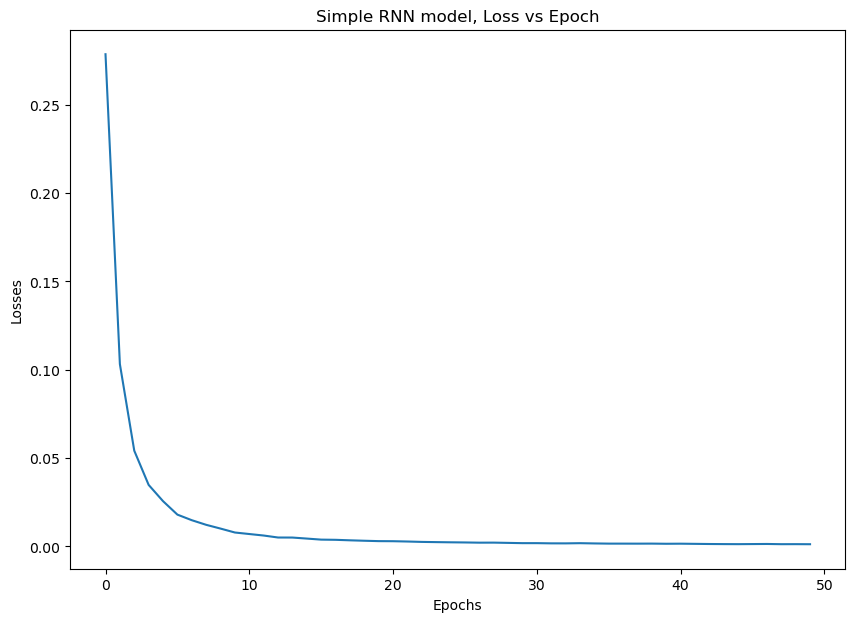

In [61]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

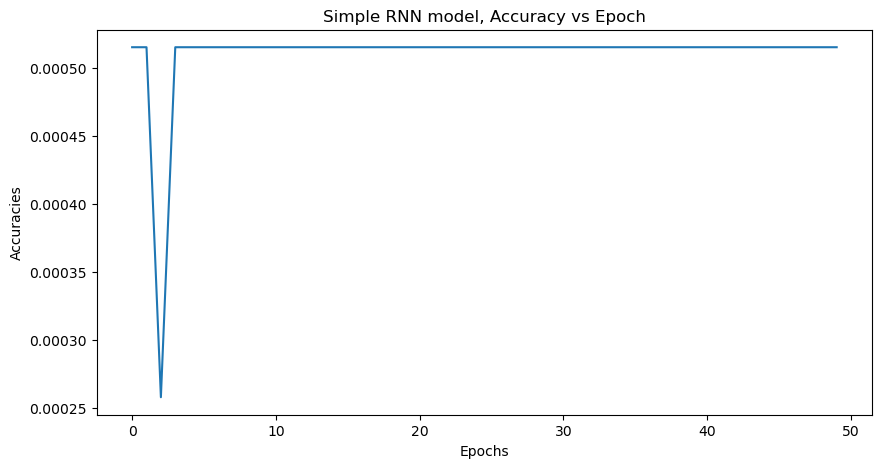

In [62]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [63]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

122/122 [==============================] - 1s 7ms/step


(3882, 1)

In [64]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(3882, 1)

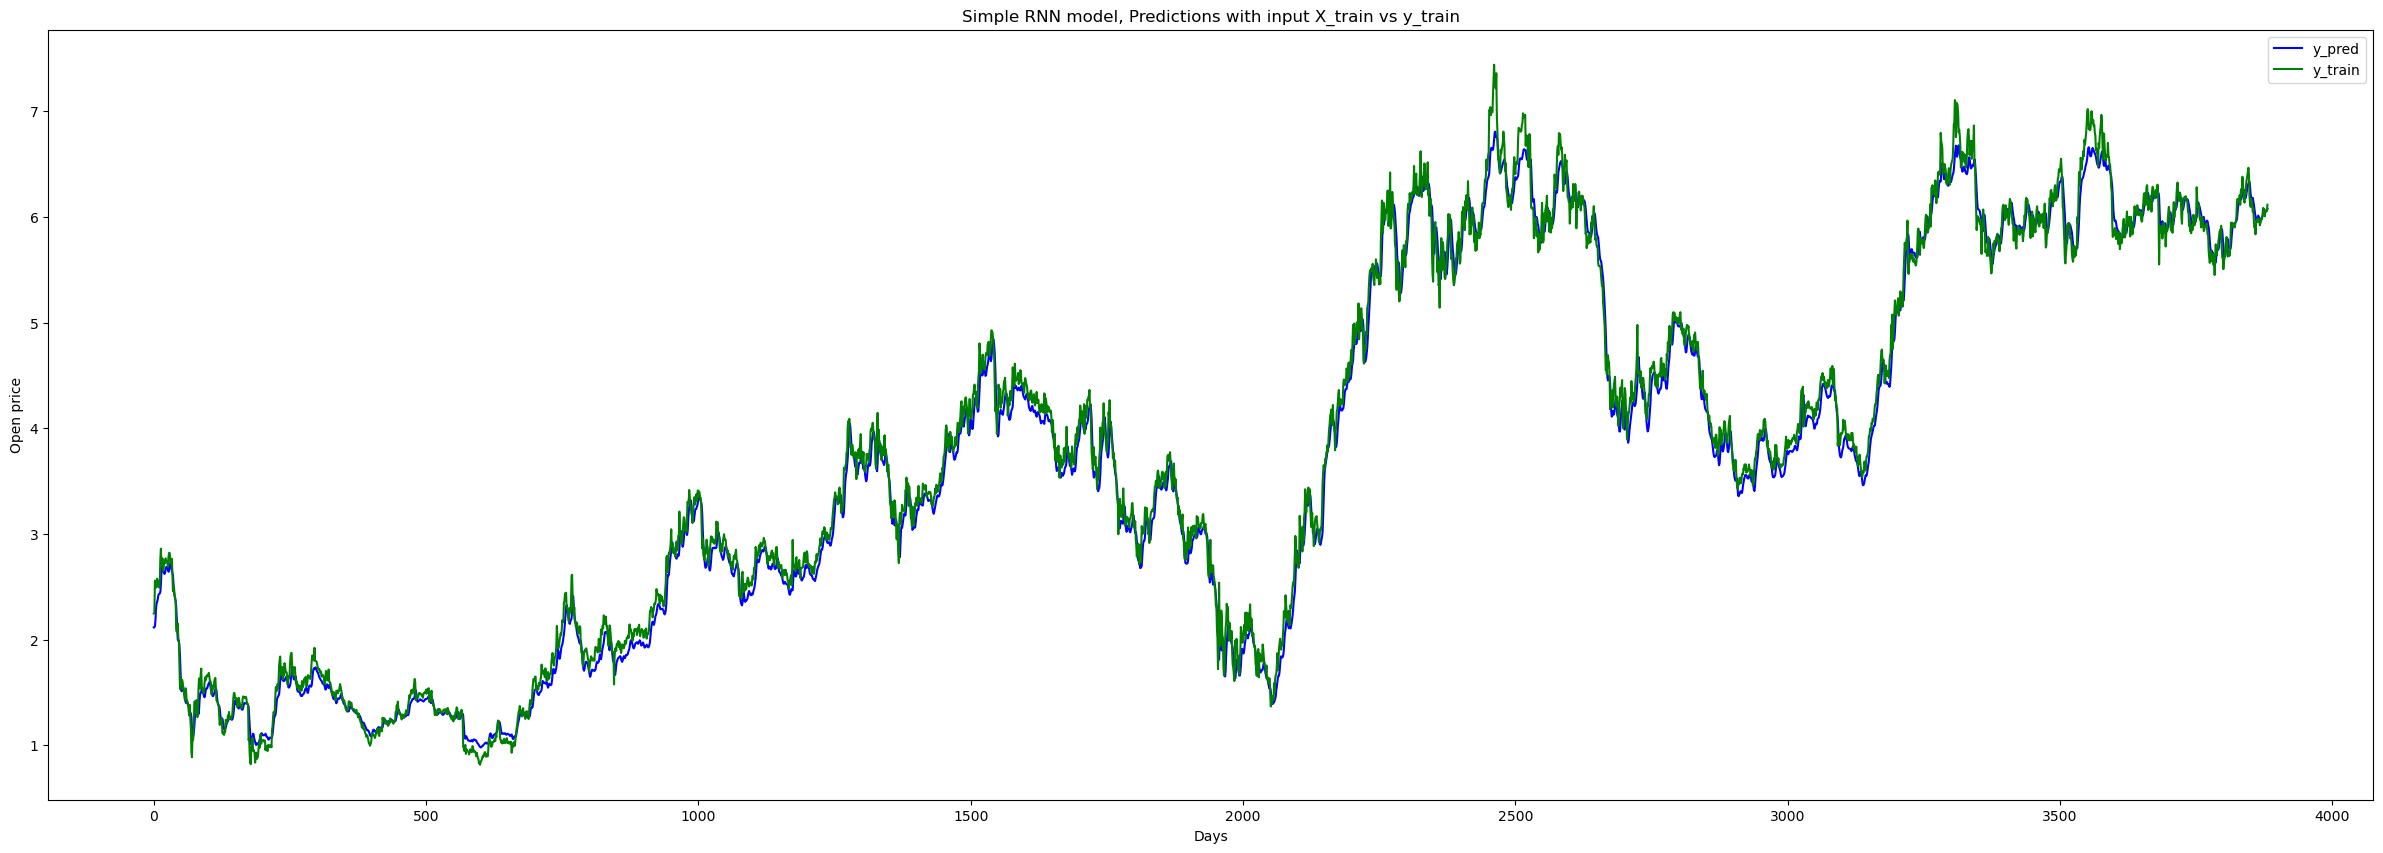

In [65]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [66]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (1685, 1)


In [67]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [68]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [69]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (1635, 50)
Shape of y_test before reshape : (1635,)


In [70]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [71]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (1635, 50, 1)
Shape of y_test after reshape : (1635, 1)


In [72]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

52/52 [==============================] - 0s 7ms/step
Shape of y_pred_of_test : (1635, 1)


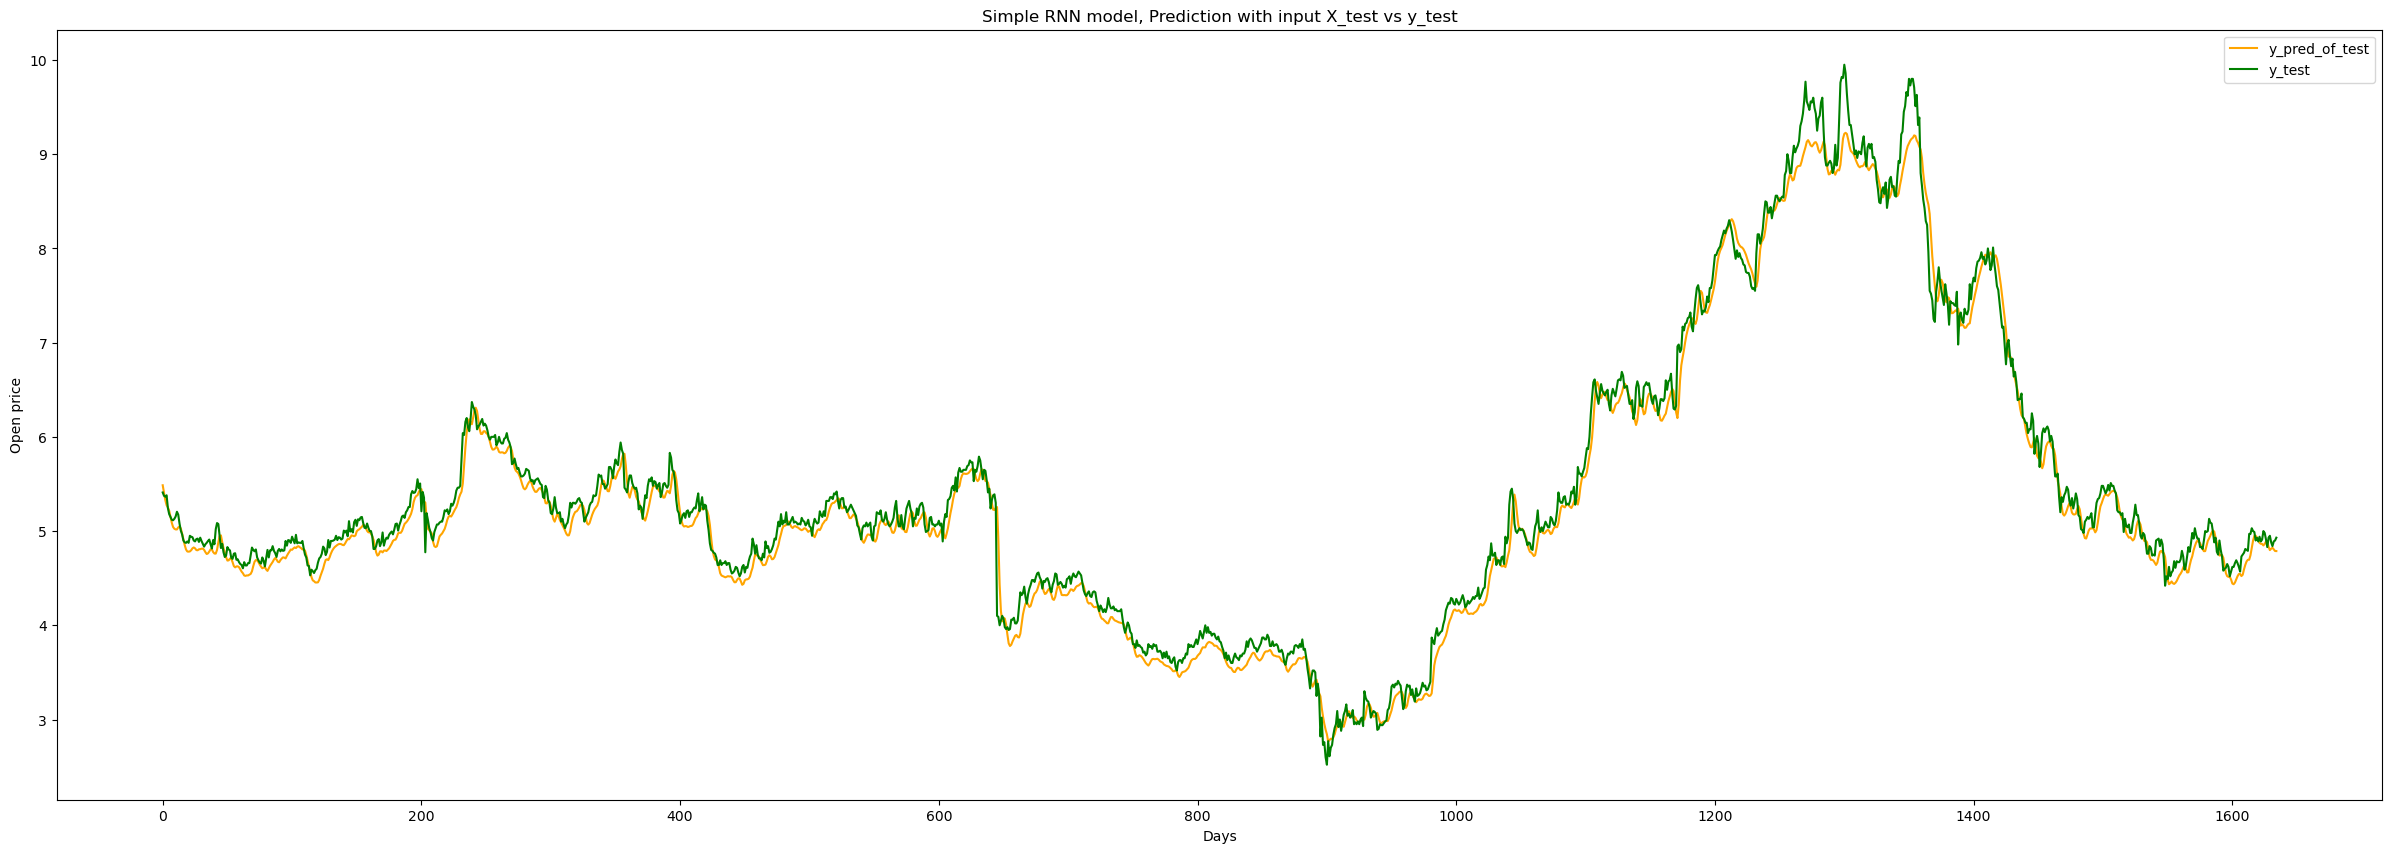

In [73]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

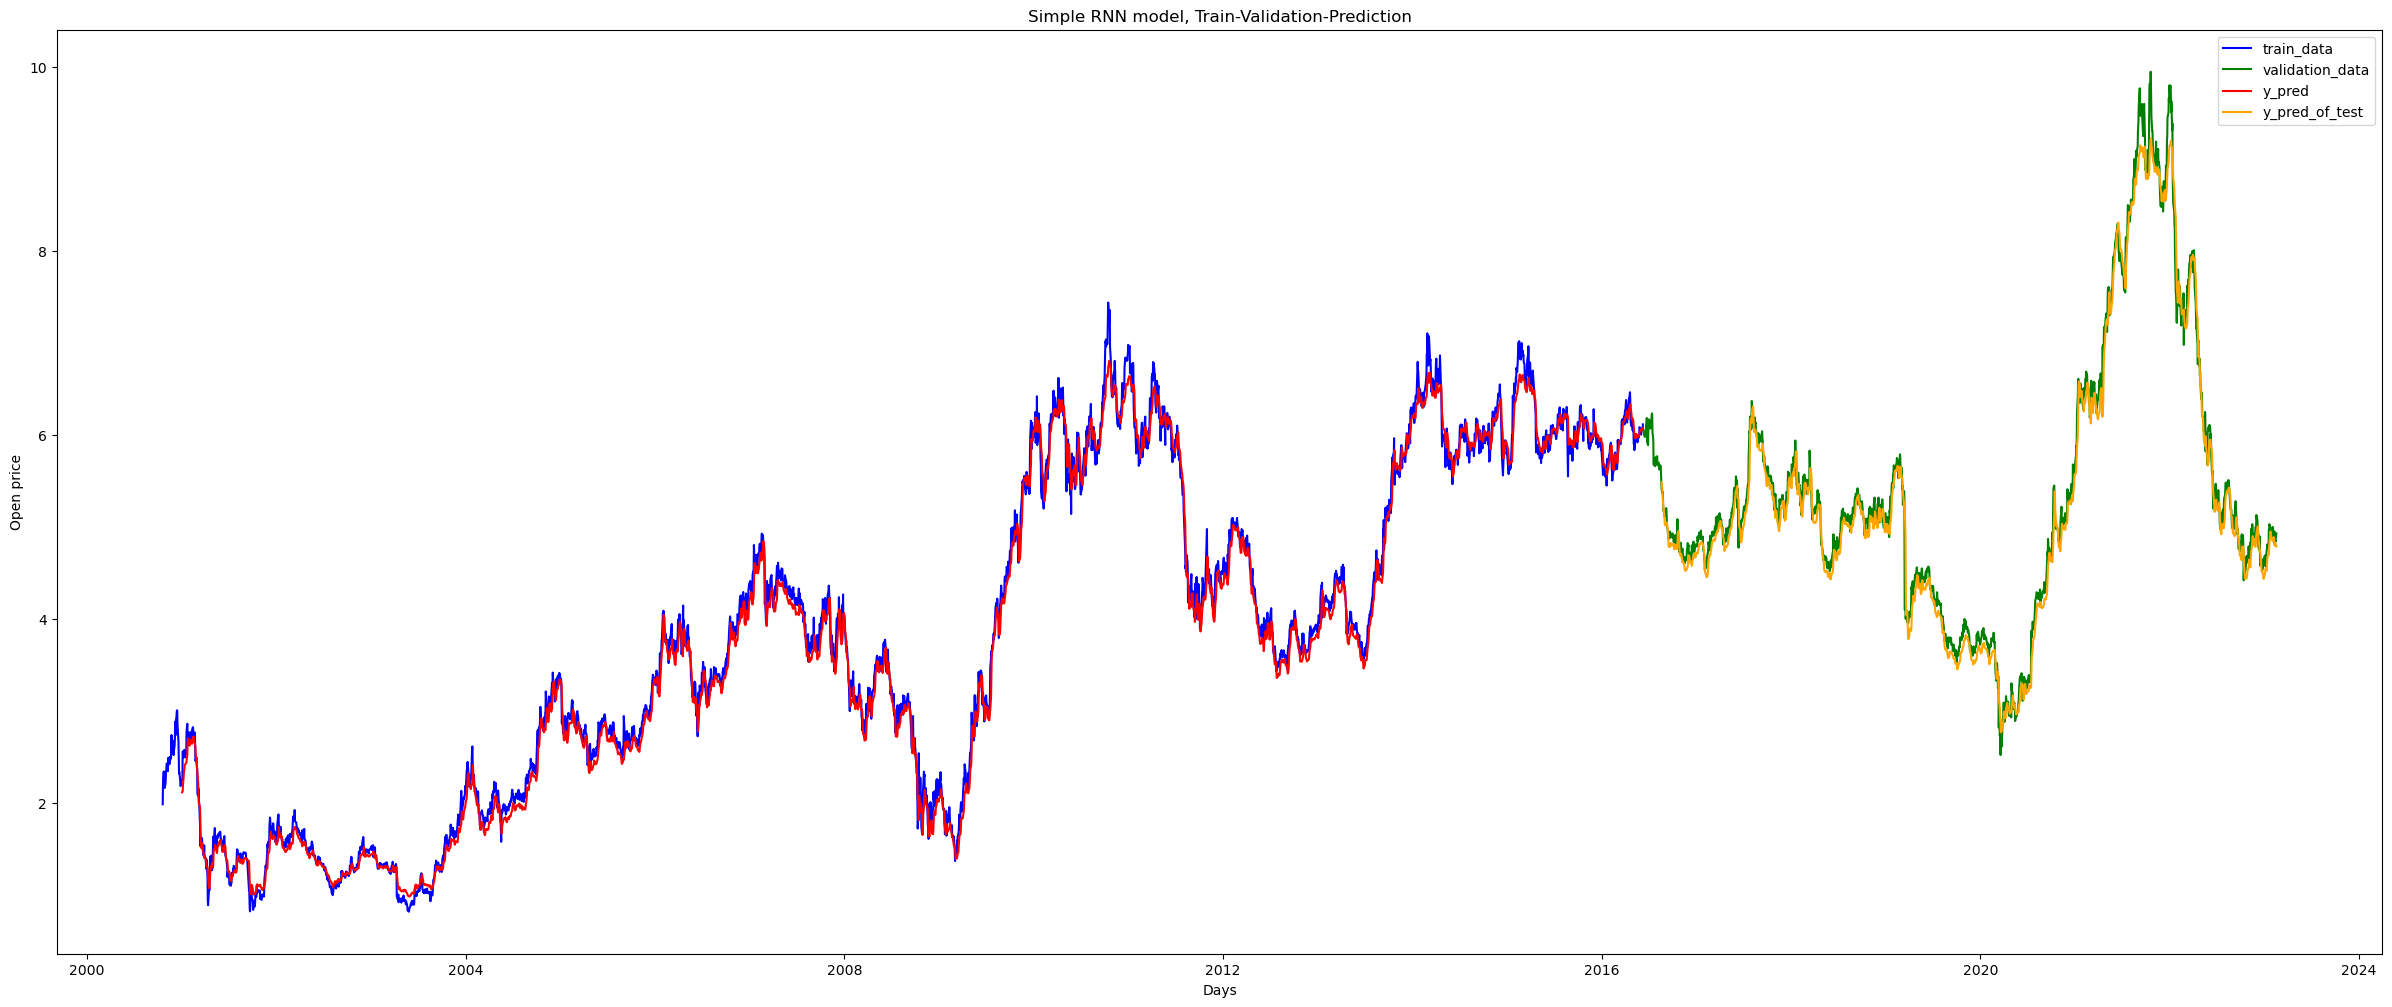

In [74]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

# LSTM

In [75]:
y_train = scaler.fit_transform(y_train)

In [76]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
389/389 [==============================] - 15s 27ms/step - loss: 0.0026 - accuracy: 5.1520e-04
Epoch 2/10
389/389 [==============================] - 10s 26ms/step - loss: 7.1110e-04 - accuracy: 5.1520e-04
Epoch 3/10
389/389 [==============================] - 10s 25ms/step - loss: 5.9926e-04 - accuracy: 5.1520e-04
Epoch 4/10
389/389 [==============================] - 10s 27ms/step - loss: 4.7742e-04 - accuracy: 5.1520e-04
Epoch 5/10
389/389 [==============================] - 12s 31ms/step - loss: 3.9704e-04 - accuracy: 5.1520e-04
Epoch 6/10
389/389 [==============================] - 12s 31ms/step - loss: 3.3671e-04 - accuracy: 5.1520e-04
Epoch 7/10
389/389 [==============================] - 13s 32ms/step - loss: 3.9020e-04 - accuracy: 5.1520e-04
Epoch 8/10
389/389 [==============================] - 12s 32ms/step - loss: 2.9461e-04 - accuracy: 5.1520e-04
Epoch 9/10
389/389 [==============================] - 12s 31ms/step - loss: 2.7083e-04 - accuracy: 5.1520e-04
Epoch 10/10
38

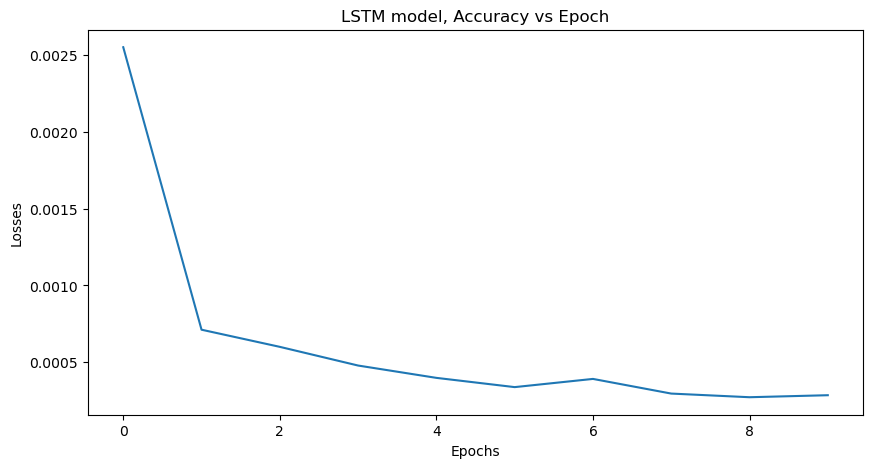

In [77]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

52/52 [==============================] - 1s 12ms/step


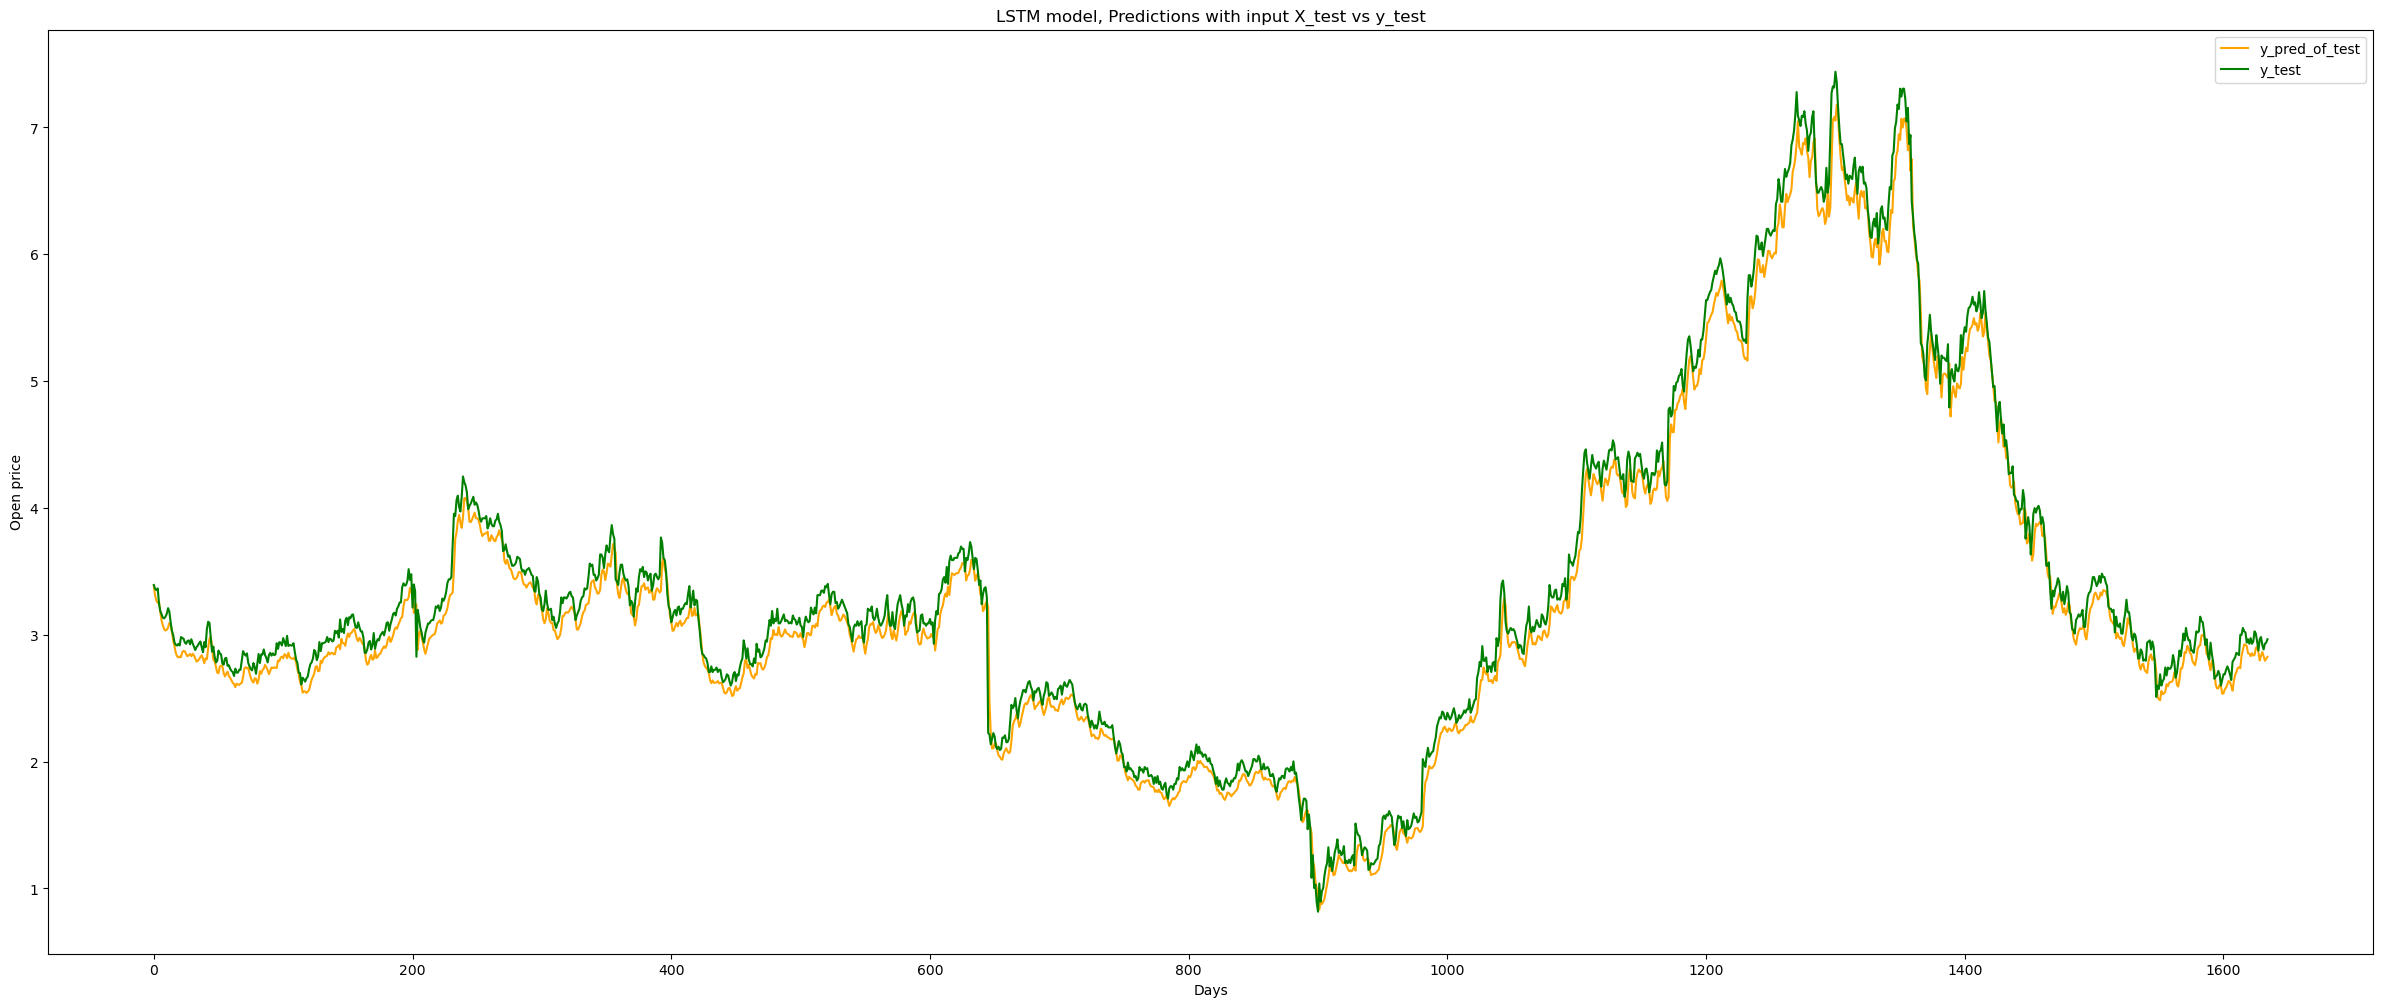

In [78]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [79]:
data.iloc[-1]

Date         2023-02-16
Open               4.93
High               4.96
Low                4.89
Close              4.92
Adj Close          4.92
Volume          1665300
Name: 5616, dtype: object

In [80]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.9215678 ],
        [0.7058823 ],
        [0.80392091],
        [0.50980414],
        [0.45098023],
        [0.74509793],
        [0.54901977],
        [0.4117646 ],
        [0.11764689],
        [0.15686253],
        [0.17647081],
        [0.25490207],
        [0.19607816],
        [0.        ],
        [0.09803955],
        [0.19607816],
        [0.19607816],
        [0.27450942],
        [0.33333333],
        [0.27450942],
        [0.19607816],
        [0.09803955],
        [0.4117646 ],
        [0.45098023],
        [0.49019586],
        [0.56862712],
        [0.54901977],
        [0.52941149],
        [0.88235217],
        [0.88235217],
        [1.        ],
        [0.94117609],
        [0.9215678 ],
        [0.74509793],
        [0.80392091],
        [0.72548965],
        [0.82352919],
        [0.72548965],
        [0.76470528],
        [0.94117609],
        [0.90196045],
        [0.76470528],
        [0.60784275],
        [0.80392091],
        [0.84313654],
        [0

In [81]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 27ms/step
Simple RNN, Open price prediction for 3/18/2017      : 4.8970704
LSTM prediction, Open price prediction for 3/18/2017 : 4.916143


# GARCH

To predict the volatility in the model we will try to use Garch model. This will ensure that burst is captured. 

In [82]:
df = data

We calculate the returns with the help of following formula and make it a column corrosponding to the dates. 

In [83]:
df['Rt'] = (np.log(df['Adj Close'])-np.log(df['Adj Close'].shift(1))).dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Rt
0,2000-10-19,1.984835,2.199487,1.845450,2.196699,1.866598,41542018,NaN
1,2000-10-20,2.196699,2.377899,2.179973,2.352810,1.999250,15871118,0.068654
2,2000-10-23,2.341659,2.341659,2.113069,2.157672,1.833436,6477138,-0.086580
3,2000-10-24,2.168822,2.207850,2.157672,2.179973,1.852386,3721720,0.010283
4,2000-10-25,2.171610,2.196699,2.163247,2.177186,1.850017,3013248,-0.001279


In [84]:
# Drop the null values in the Rt columns
data = df['Rt'].dropna()
data = data*100 # To chane into percentage
data.head()

1    6.865437
2   -8.658022
3    1.028279
4   -0.127948
5   -1.159093
Name: Rt, dtype: float64

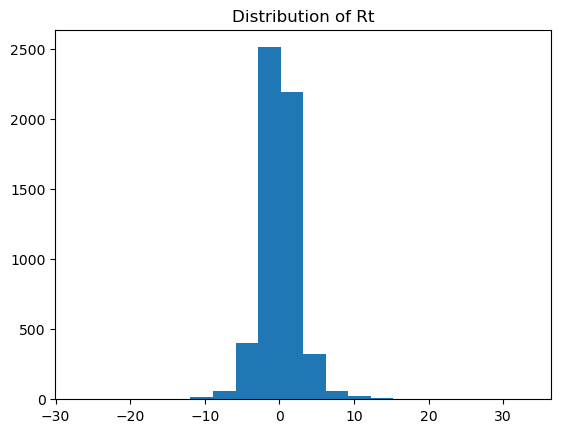

In [85]:
# To check the distribution of returns
plt.hist(data,bins=20)
plt.title("Distribution of Rt")
plt.show()

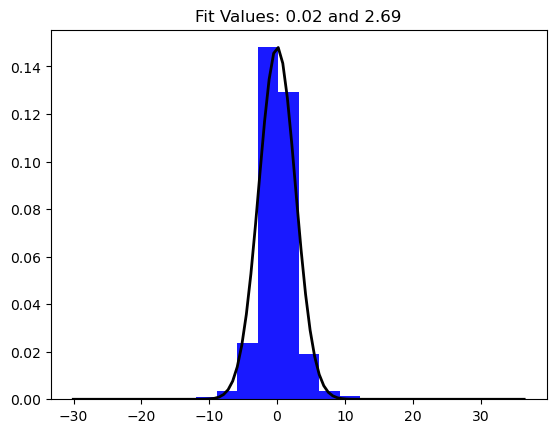

In [86]:
from scipy.stats import norm
  
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data,bins=20, density=True, alpha=0.9, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

In [87]:
data.describe()

count    5616.000000
mean        0.017258
std         2.692086
min       -27.015970
25%        -1.182977
50%         0.000000
75%         1.191094
max        33.409926
Name: Rt, dtype: float64

In [99]:
# from statsmodels.stats.diagnostic import acorr_ljungbox 
# ljung_res = acorr_ljungbox(data, lags= 10, boxpierce=True)
# print(f'Ljung-Box p-values: {ljung_res[1]}')
# print(f'\nBox-Pierce p-values: {ljung_res[3]}')

In [89]:
from scipy.stats import anderson
AD_test = anderson(data,dist='norm')
print(AD_test)

AndersonResult(statistic=110.47794575854641, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [90]:
d_sq = data.mul(data)
d_sq.head()

1    47.134226
2    74.961345
3     1.057358
4     0.016371
5     1.343497
Name: Rt, dtype: float64

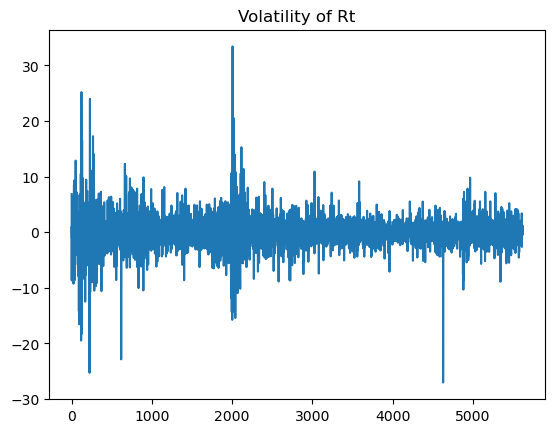

In [91]:
pyplot.plot(data)
plt.title("Volatility of Rt")
pyplot.show()

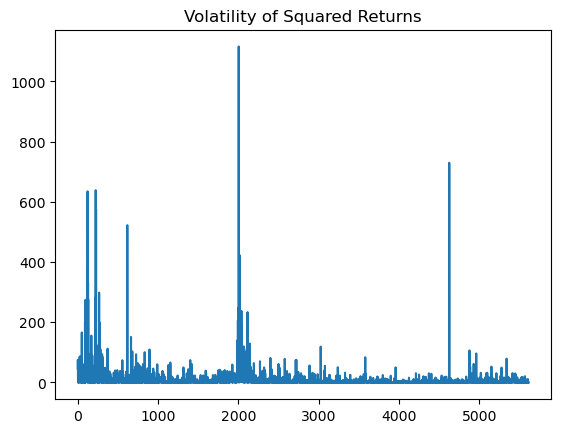

In [92]:
pyplot.plot(d_sq)
plt.title("Volatility of Squared Returns")
pyplot.show()

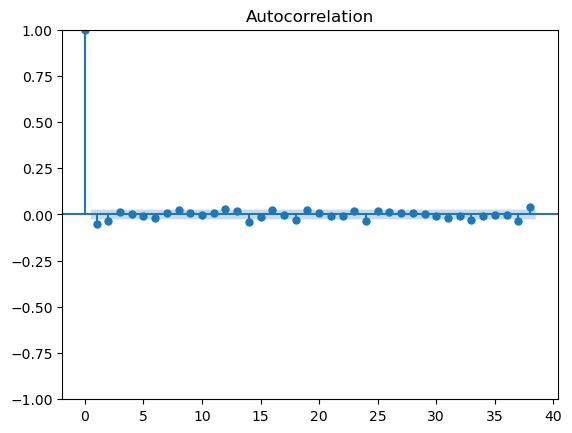

In [93]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
pyplot.show()

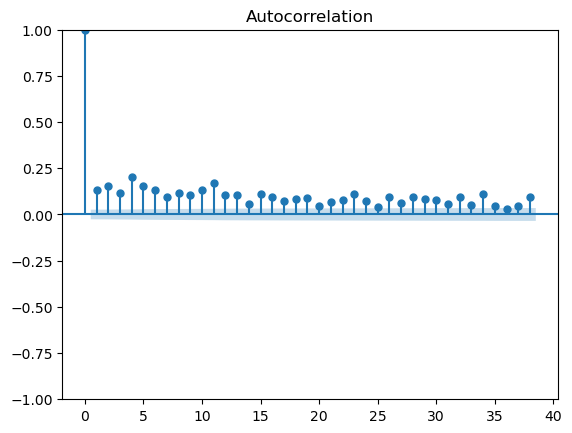

In [94]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(d_sq)
pyplot.show()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 113953.40403134584
Iteration:      2,   Func. Count:     13,   Neg. LLF: 92357.57157559725
Iteration:      3,   Func. Count:     19,   Neg. LLF: 16519.74164770608
Iteration:      4,   Func. Count:     25,   Neg. LLF: 16096.844666726724
Iteration:      5,   Func. Count:     31,   Neg. LLF: 12473.624784309304
Iteration:      6,   Func. Count:     37,   Neg. LLF: 12475.93567936756
Iteration:      7,   Func. Count:     43,   Neg. LLF: 12453.445023568807
Iteration:      8,   Func. Count:     49,   Neg. LLF: 12451.981825653185
Iteration:      9,   Func. Count:     54,   Neg. LLF: 12451.89676346083
Iteration:     10,   Func. Count:     59,   Neg. LLF: 12451.889645705069
Iteration:     11,   Func. Count:     64,   Neg. LLF: 12451.889216911926
Iteration:     12,   Func. Count:     69,   Neg. LLF: 12451.889208508446
Iteration:     13,   Func. Count:     74,   Neg. LLF: 12451.88920727057
Iteration:     14,   Func. Count:     78,   Neg. LLF: 12

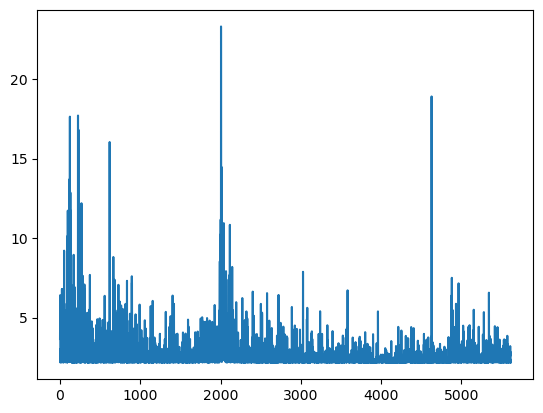

In [95]:
arch_1 = arch_model(data,mean = 'Constant',vol='Arch',p=1,dist='t')
arch_1_t = arch_1.fit()
print(arch_1_t.summary())
pyplot.plot(arch_1_t.conditional_volatility)

In [96]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = data[:-(test_size-i)]
    model = arch_model(train,mean='Constant',vol='ARCH', p=1, q=1,dist='skewt')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1,reindex=False)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [97]:
rolling_predictions = pd.Series(rolling_predictions, index=data.index[-365:])

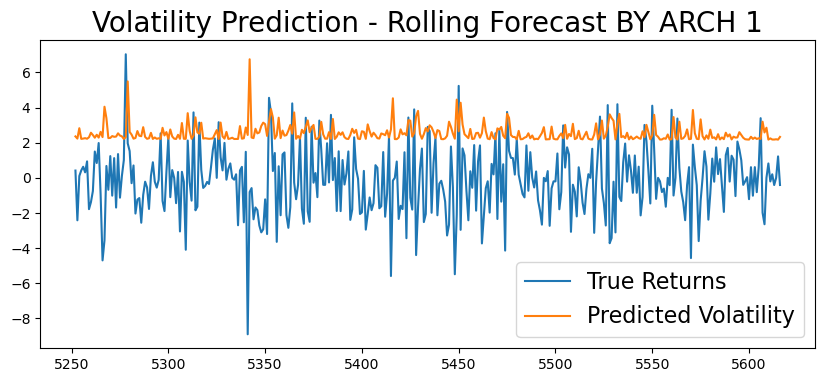

In [98]:
plt.figure(figsize=(10,4))
true, = plt.plot(data[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast BY ARCH 1', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [ ]:
# For all the stocks using the for loop
cnt=0
for i in all_files:
    data = pd.read_csv(i)
    length_data = len(data)     # rows that data has
    split_ratio = 0.7           # %70 train + %30 validation
    length_train = round(length_data * split_ratio)  
    length_validation = length_data - length_train
    print("Data length :", length_data)
    print("Train data length :", length_train)
    print("Validation data lenth :", length_validation)
    train_data = data[:length_train].iloc[:,:2] 
    train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
    train_data
    validation_data = data[length_train:].iloc[:,:2]
    validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
    validation_data
    dataset_train = train_data.Open.values
    dataset_train.shape
    dataset_train = np.reshape(dataset_train, (-1,1))
    dataset_train.shape
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range = (0,1))


    # scaling dataset
    dataset_train_scaled = scaler.fit_transform(dataset_train)

    dataset_train_scaled.shape
    plt.subplots(figsize = (15,6))
    plt.plot(dataset_train_scaled)
    plt.xlabel("Days as 1st, 2nd, 3rd..")
    plt.ylabel("Open Price")
    plt.show()
    X_train = []
    y_train = []

    time_step = 50

    for i in range(time_step, length_train):
        X_train.append(dataset_train_scaled[i-time_step:i,0])
        y_train.append(dataset_train_scaled[i,0])

    # convert list to array
    X_train, y_train = np.array(X_train), np.array(y_train)
    print("Shape of X_train before reshape :",X_train.shape)
    print("Shape of y_train before reshape :",y_train.shape)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
    y_train = np.reshape(y_train, (y_train.shape[0],1))

    print("Shape of X_train after reshape :",X_train.shape)
    print("Shape of y_train after reshape :",y_train.shape)
    # importing libraries
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import SimpleRNN
    from keras.layers import Dropout

    # initializing the RNN
    regressor = Sequential()

    # adding first RNN layer and dropout regulatization
    regressor.add(
        SimpleRNN(units = 50, 
                  activation = "relu", 
                  return_sequences = True, 
                  input_shape = (X_train.shape[1],1))
                 )

    regressor.add(
        Dropout(0.2)
                 )


    # adding second RNN layer and dropout regulatization

    regressor.add(
        SimpleRNN(units = 50, 
                  activation = "relu", 
                  return_sequences = True)
                 )

    regressor.add(
        Dropout(0.2)
                 )

    # adding third RNN layer and dropout regulatization

    regressor.add(
        SimpleRNN(units = 50, 
                  activation = "relu", 
                  return_sequences = True)
                 )

    regressor.add(
        Dropout(0.2)
                 )

    # adding fourth RNN layer and dropout regulatization

    regressor.add(
        SimpleRNN(units = 50)
                 )

    regressor.add(
        Dropout(0.2)
                 )

    # adding the output layer
    regressor.add(Dense(units = 1))

    # compiling RNN
    regressor.compile(
        optimizer = "adam", 
        loss = "mean_squared_error",
        metrics = ["accuracy"])

    # fitting the RNN
    history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)
    # Plotting Loss vs Epochs
    plt.figure(figsize =(10,7))
    plt.plot(history.history["loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Losses")
    plt.title("Simple RNN model, Loss vs Epoch")
    plt.show()
    # Plotting Accuracy vs Epochs
    plt.figure(figsize =(10,5))
    plt.plot(history.history["accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracies")
    plt.title("Simple RNN model, Accuracy vs Epoch")
    plt.show()
    y_pred = regressor.predict(X_train)  # predictions
    y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
    y_pred.shape
    y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
    y_train.shape
    # visualisation
    plt.figure(figsize = (30,10))
    plt.plot(y_pred, color = "b", label = "y_pred" )
    plt.plot(y_train, color = "g", label = "y_train")
    plt.xlabel("Days")
    plt.ylabel("Open price")
    plt.title("Simple RNN model, Predictions with input X_train vs y_train")
    plt.legend()
    plt.show()
    dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
    dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
    scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
    print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)
    # Creating X_test and y_test
    X_test = []
    y_test = []

    for i in range(time_step, length_validation):
        X_test.append(scaled_dataset_validation[i-time_step:i,0])
        y_test.append(scaled_dataset_validation[i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    print("Shape of X_test before reshape :",X_test.shape)
    print("Shape of y_test before reshape :",y_test.shape)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
    y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array
    print("Shape of X_test after reshape :",X_test.shape)
    print("Shape of y_test after reshape :",y_test.shape)
    # predictions with X_test data
    y_pred_of_test = regressor.predict(X_test)
    # scaling back from 0-1 to original
    y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
    print("Shape of y_pred_of_test :",y_pred_of_test.shape)
    # visualisation
    plt.figure(figsize = (30,10))
    plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
    plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
    plt.xlabel("Days")
    plt.ylabel("Open price")
    plt.title("Simple RNN model, Prediction with input X_test vs y_test")
    plt.legend()
    plt.show()
    # Visualisation
    plt.subplots(figsize =(30,12))
    plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
    plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
    plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
    plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
    plt.xlabel("Days")
    plt.ylabel("Open price")
    plt.title("Simple RNN model, Train-Validation-Prediction")
    plt.legend()
    plt.show()
    
    
    
    
    
    
    
#     print(stock_symbols[cnt]," have ", data.Close.isnull().sum() ," null values")